# Visualizing LUAD Gene Expression

### importing libraries

In [24]:
import pandas as pd
import numpy as np 

### reading data

In [25]:
df = pd.read_csv('LUAD_rsem_normal_tumor.sample.txt', sep='\t')

### exploring the dataframe

In [26]:
df.head()

,Gene,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,Normal.8,...,Tumor.5,Tumor.6,Tumor.7,Tumor.8,Tumor.9,Tumor.10,Tumor.11,Tumor.12,Tumor.13,Tumor.14
0,A1BG,1,86.1017,51.2577,103.7700,99.6544,138.7365,74.2530,237.2049,243.9686,...,359.4863,79.6312,54.5498,73.1611,158.8152,41.9737,163.1712,64.8333,29.2505,242.1940
1,A1CF,29974,0.0000,0.0000,0.0000,0.0000,0.5692,0.0000,0.3747,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,A2BP1,54715,0.3082,0.0000,1.3937,0.0000,0.0000,0.4745,1.1240,0.0000,...,0.0000,0.0000,0.3603,2.8188,1.7683,0.0000,0.0000,264.5390,0.0000,8.2090
3,A2LD1,87769,57.1125,60.2753,81.6237,78.6636,68.1047,70.1963,91.5024,59.8984,...,107.2146,67.9799,68.1639,161.5436,83.8904,43.9649,101.5073,81.1028,168.4186,79.9254
4,A2M,2,133594.6379,133695.1685,113644.1812,73240.7488,68335.7314,135432.6125,61787.8157,33512.8328,...,4884.4635,47086.2951,36847.5940,28800.7202,44583.4660,15691.2018,19518.7370,21294.6135,11774.1682,17508.8284


In [27]:
display(df.head())
display(df.shape)

,Gene,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,Normal.8,...,Tumor.5,Tumor.6,Tumor.7,Tumor.8,Tumor.9,Tumor.10,Tumor.11,Tumor.12,Tumor.13,Tumor.14
0,A1BG,1,86.1017,51.2577,103.7700,99.6544,138.7365,74.2530,237.2049,243.9686,...,359.4863,79.6312,54.5498,73.1611,158.8152,41.9737,163.1712,64.8333,29.2505,242.1940
1,A1CF,29974,0.0000,0.0000,0.0000,0.0000,0.5692,0.0000,0.3747,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,A2BP1,54715,0.3082,0.0000,1.3937,0.0000,0.0000,0.4745,1.1240,0.0000,...,0.0000,0.0000,0.3603,2.8188,1.7683,0.0000,0.0000,264.5390,0.0000,8.2090
3,A2LD1,87769,57.1125,60.2753,81.6237,78.6636,68.1047,70.1963,91.5024,59.8984,...,107.2146,67.9799,68.1639,161.5436,83.8904,43.9649,101.5073,81.1028,168.4186,79.9254
4,A2M,2,133594.6379,133695.1685,113644.1812,73240.7488,68335.7314,135432.6125,61787.8157,33512.8328,...,4884.4635,47086.2951,36847.5940,28800.7202,44583.4660,15691.2018,19518.7370,21294.6135,11774.1682,17508.8284


(20502, 31)

### problems w the data
 1. index is random
 2. normal and tumor separated by trial readings 
 3. gene expression is not tidy

### we want something like  || gene || normal or tumor || expression level ||

### get columns 

In [28]:

df.columns.tolist()

['Gene',
 'Normal',
 'Normal.1',
 'Normal.2',
 'Normal.3',
 'Normal.4',
 'Normal.5',
 'Normal.6',
 'Normal.7',
 'Normal.8',
 'Normal.9',
 'Normal.10',
 'Normal.11',
 'Normal.12',
 'Normal.13',
 'Normal.14',
 'Tumor',
 'Tumor.1',
 'Tumor.2',
 'Tumor.3',
 'Tumor.4',
 'Tumor.5',
 'Tumor.6',
 'Tumor.7',
 'Tumor.8',
 'Tumor.9',
 'Tumor.10',
 'Tumor.11',
 'Tumor.12',
 'Tumor.13',
 'Tumor.14']

### reshape or "melt" data to make it "stacked" (long format instead of wide format)

In [29]:
?pd.DataFrame.melt

In [30]:
df_stack = pd.melt(df, id_vars=['Gene'], value_vars = ['Normal',
 'Normal.1',
 'Normal.2',
 'Normal.3',
 'Normal.4',
 'Normal.5',
 'Normal.6',
 'Normal.7',
 'Normal.8',
 'Normal.9',
 'Normal.10',
 'Normal.11',
 'Normal.12',
 'Normal.13',
 'Normal.14',
 'Tumor',
 'Tumor.1',
 'Tumor.2',
 'Tumor.3',
 'Tumor.4',
 'Tumor.5',
 'Tumor.6',
 'Tumor.7',
 'Tumor.8',
 'Tumor.9',
 'Tumor.10',
 'Tumor.11',
 'Tumor.12',
 'Tumor.13',
 'Tumor.14'], var_name='Cancerous', value_name='Expression')

In [31]:
df_stack.shape

(615060, 3)

In [32]:
df_stack.tail()

,Gene,Cancerous,Expression
615055,ZYG11A,Tumor.14,61.9403
615056,ZYG11B,Tumor.14,807.4627
615057,ZYX,Tumor.14,4368.6567
615058,ZZEF1,Tumor.14,1033.5821
615059,ZZZ3,Tumor.14,641.0448


### remove the numbers in 'Cancerous'

In [33]:
for index, data in df_stack.iterrows():
    if (data.Cancerous.startswith('Normal')):
        df_stack.at[index, 'Cancerous'] = 'Normal'
    else:
        df_stack.at[index, 'Cancerous'] = 'Tumor'

In [34]:
df_stack

,Gene,Cancerous,Expression
0,A1BG,Normal,1.0000
1,A1CF,Normal,29974.0000
2,A2BP1,Normal,54715.0000
3,A2LD1,Normal,87769.0000
4,A2M,Normal,2.0000
...,...,...,...
615055,ZYG11A,Tumor,61.9403
615056,ZYG11B,Tumor,807.4627
615057,ZYX,Tumor,4368.6567
615058,ZZEF1,Tumor,1033.5821


### using groupby to calculate mean for normal and tumor

In [35]:
df_stack.groupby(['Cancerous'])['Expression'].mean()

Cancerous
Normal    123734.934183
Tumor        963.243134
Name: Expression, dtype: float64

### log transform gene expression to normalize, ie. put normal and tumor values on the same scale

In [37]:
expr = df_stack['Expression']
df_stack['Expression_Norm'] = np.log2(expr+1)
df_stack.head()

,Gene,Cancerous,Expression,Expression_Norm
0,A1BG,Normal,1.0,1.000000
1,A1CF,Normal,29974.0,14.871472
2,A2BP1,Normal,54715.0,15.739675
3,A2LD1,Normal,87769.0,16.421440
4,A2M,Normal,2.0,1.584963


### query

In [38]:
df_stack.query('Expression_Norm > 1.47 & Expression_Norm <1.5').get('Gene').unique()

array(['KCNK4', 'HBG2', 'KRTAP5-2', 'SLC25A21', 'SLC5A10', 'CDRT1',
       'AACSL', 'ABCG5', 'ACSBG2', 'ADCYAP1', 'AKNAD1', 'ANKRD55',
       'AQP7P1', 'ASAH2', 'ASB12', 'ASTN1', 'ATP4B', 'BCL8', 'BRSK2',
       'BTBD16', 'C12orf36', 'C12orf71', 'C13orf16', 'C14orf19',
       'C15orf2', 'C16orf3', 'C18orf56', 'C19orf71', 'C21orf81',
       'C7orf16', 'C7orf61', 'C9orf128', 'CA10', 'CAMK2N2', 'CAPN14',
       'CCDC144B', 'CDH22', 'CLEC17A', 'CNGA3', 'COL25A1', 'CPN2', 'CR1L',
       'CRYBA4', 'CSNK1A1L', 'CSRNP3', 'CYP2A7', 'DDN', 'DGCR10',
       'DMRTA2', 'DPEP3', 'DPY19L2P4', 'EPX', 'F7', 'FAM133A', 'FAM187B',
       'FAM194A', 'FAM74A1', 'FAM90A1', 'FBXO43', 'FOXD4L2', 'FOXI1',
       'GABRD', 'GPC2', 'GPR150', 'GPR21', 'GPR25', 'HAND2', 'HAP1',
       'HBE1', 'HIST1H1E', 'HIST1H4E', 'HIST1H4I', 'HOXC6', 'HPDL', 'HPR',
       'HRG', 'HYAL4', 'IGSF1', 'IL17C', 'IMPG2', 'INSM1', 'IRGM',
       'KCNB2', 'KCTD19', 'KERA', 'KIR3DX1', 'KRT16', 'LOC100128573',
       'LOC100133545', 'LOC12

### select a few genes
say: ARID1A,ARID2,ARNT,ASPSCR1,GNA11,GNAQ,PML,PMX1,PNUTL1,STAG2,STAT5B,ZNF384,ZNF521 

In [39]:

selected = ["ARID1A", "ARID2", "ARNT", "ASPSCR1", "GNA11", "GNAQ", "PML", "PMX1", "PNUTL1", "STAG2", "STAT5B", "ZNF384", "ZNF521"]
df_selected = df_stack[df_stack.get('Gene').isin(selected)]

### making a boxplot

### with matplotlib

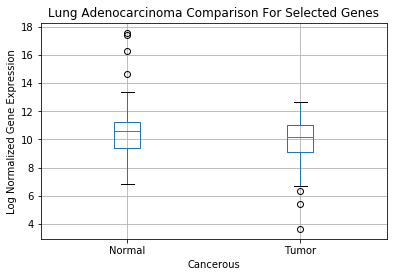

In [40]:
import matplotlib.pyplot as plt

df_selected.boxplot(column='Expression_Norm', by='Cancerous')
plt.suptitle("")
plt.title("Lung Adenocarcinoma Comparison For Selected Genes")
plt.xlabel("Cancerous")
plt.ylabel("Log Normalized Gene Expression")
plt.show()

### with seaborn

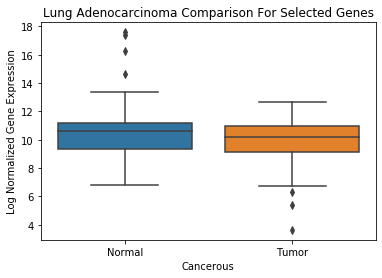

In [41]:
import seaborn as sns

axes = sns.boxplot(x = 'Cancerous', y='Expression_Norm', data=df_selected, )
#axes = sns.swarmplot(x = 'Cancerous', y='Expression_Norm', data=df_selected,color="grey")
plt.title("Lung Adenocarcinoma Comparison For Selected Genes")
plt.xlabel("Cancerous")
plt.ylabel("Log Normalized Gene Expression")
plt.show()

### with plotly

In [42]:
import plotly.offline as py
from plotly import graph_objs as go
py.init_notebook_mode(connected=True)


py.iplot({
"data": [go.graph_objs.Box(x=df_selected['Cancerous'],y=df_selected['Expression_Norm'])],
"layout" : go.Layout(dict(title="Lung Adenocarcinoma Comparison For Selected Genes", 
                         xaxis=dict(title="Cancerous"),
                         yaxis=dict(title="Log Normalized Gene Expression")))

})